In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
#Librería de graficas y colores

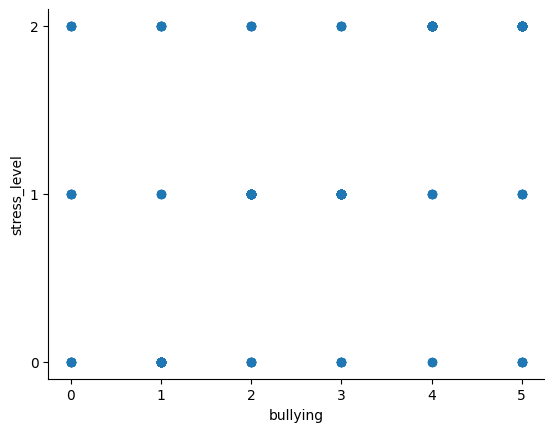

In [ ]:
arch.plot(kind='scatter', x='bullying', y='stress_level', s=32)
plt.yticks([0, 1, 2])
plt.gca().spines[['top', 'right',]].set_visible(False)

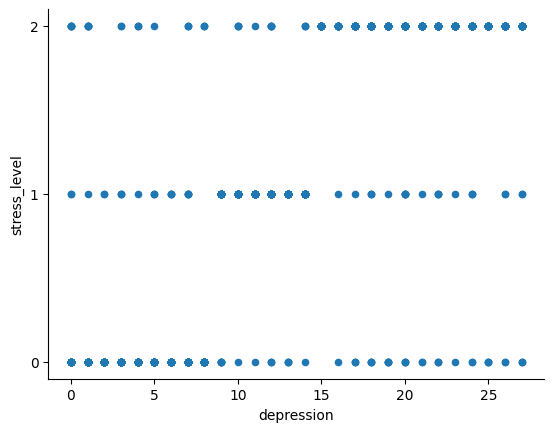

In [ ]:
arch.plot(kind='scatter', x='depression', y='stress_level')
plt.yticks([0, 1, 2])
plt.gca().spines[['top', 'right',]].set_visible(False)

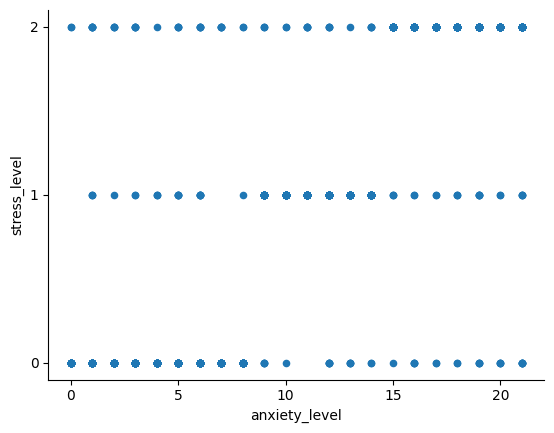

In [ ]:
arch.plot(kind='scatter', x='anxiety_level', y='stress_level')
plt.yticks([0, 1, 2])

plt.gca().spines[['top', 'right',]].set_visible(False)

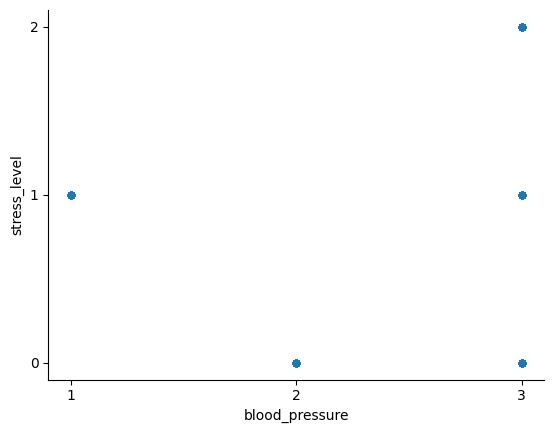

In [ ]:
x_values = [0, 1, 2, 3]
arch.plot(kind='scatter', x='blood_pressure', y='stress_level')
plt.xticks([ 1, 2, 3])
plt.yticks([ 0,1, 2 ])
plt.gca().spines[['top', 'right',]].set_visible(False)

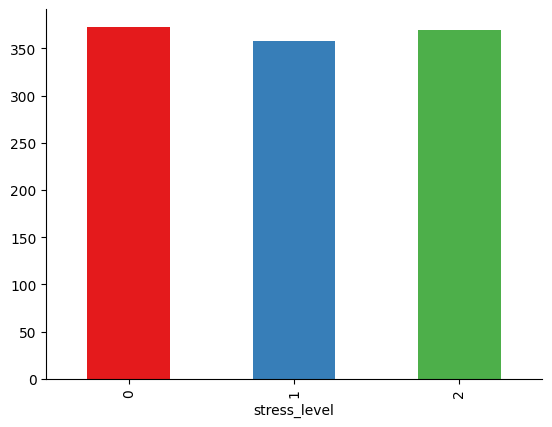

In [ ]:
from matplotlib import pyplot as plt
arch.groupby('stress_level').size().plot(kind='bar', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
arch.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


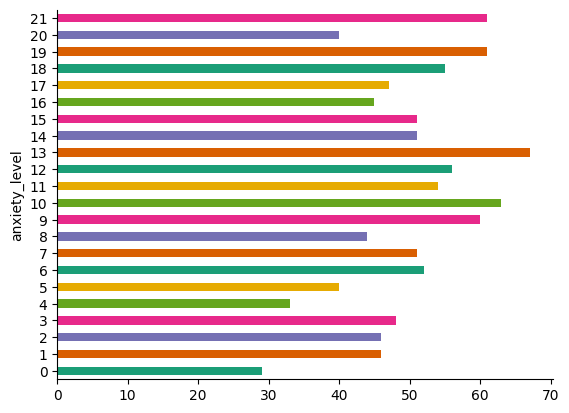

In [ ]:

arch.groupby('anxiety_level').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

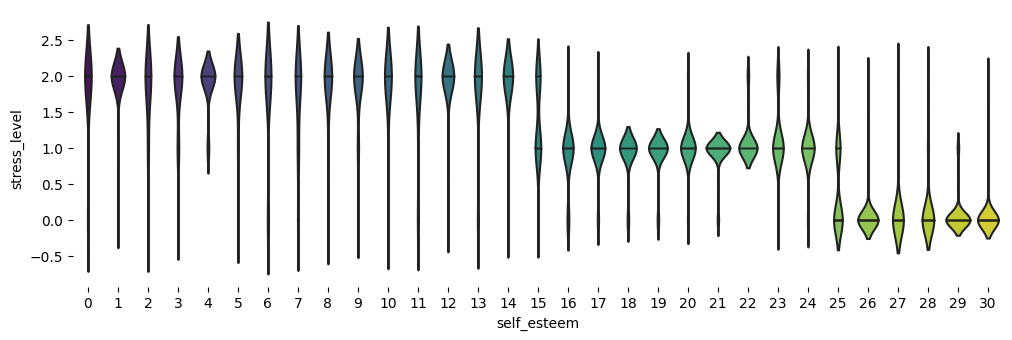

In [ ]:
figsize = (12, 1.2 * len(arch['stress_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(arch, x='self_esteem', y='stress_level', inner='stick', palette='viridis')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(arch,arch['stress_level'],train_size=.7)
X_train=X_train.drop('stress_level',axis='columns')
X_test=X_test.drop('stress_level',axis='columns')


In [ ]:
from sklearn import tree


In [ ]:
modelo=tree.DecisionTreeClassifier()
modelo.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))


[[68  4  4]
 [ 5 69  3]
 [ 2  4 61]]


In [ ]:
import graphviz
feature_names = X_test.columns
dot_data = tree.export_graphviz(modelo, out_file=None,class_names=['0','1','2'],feature_names=feature_names)
graph=graphviz.Source(dot_data)

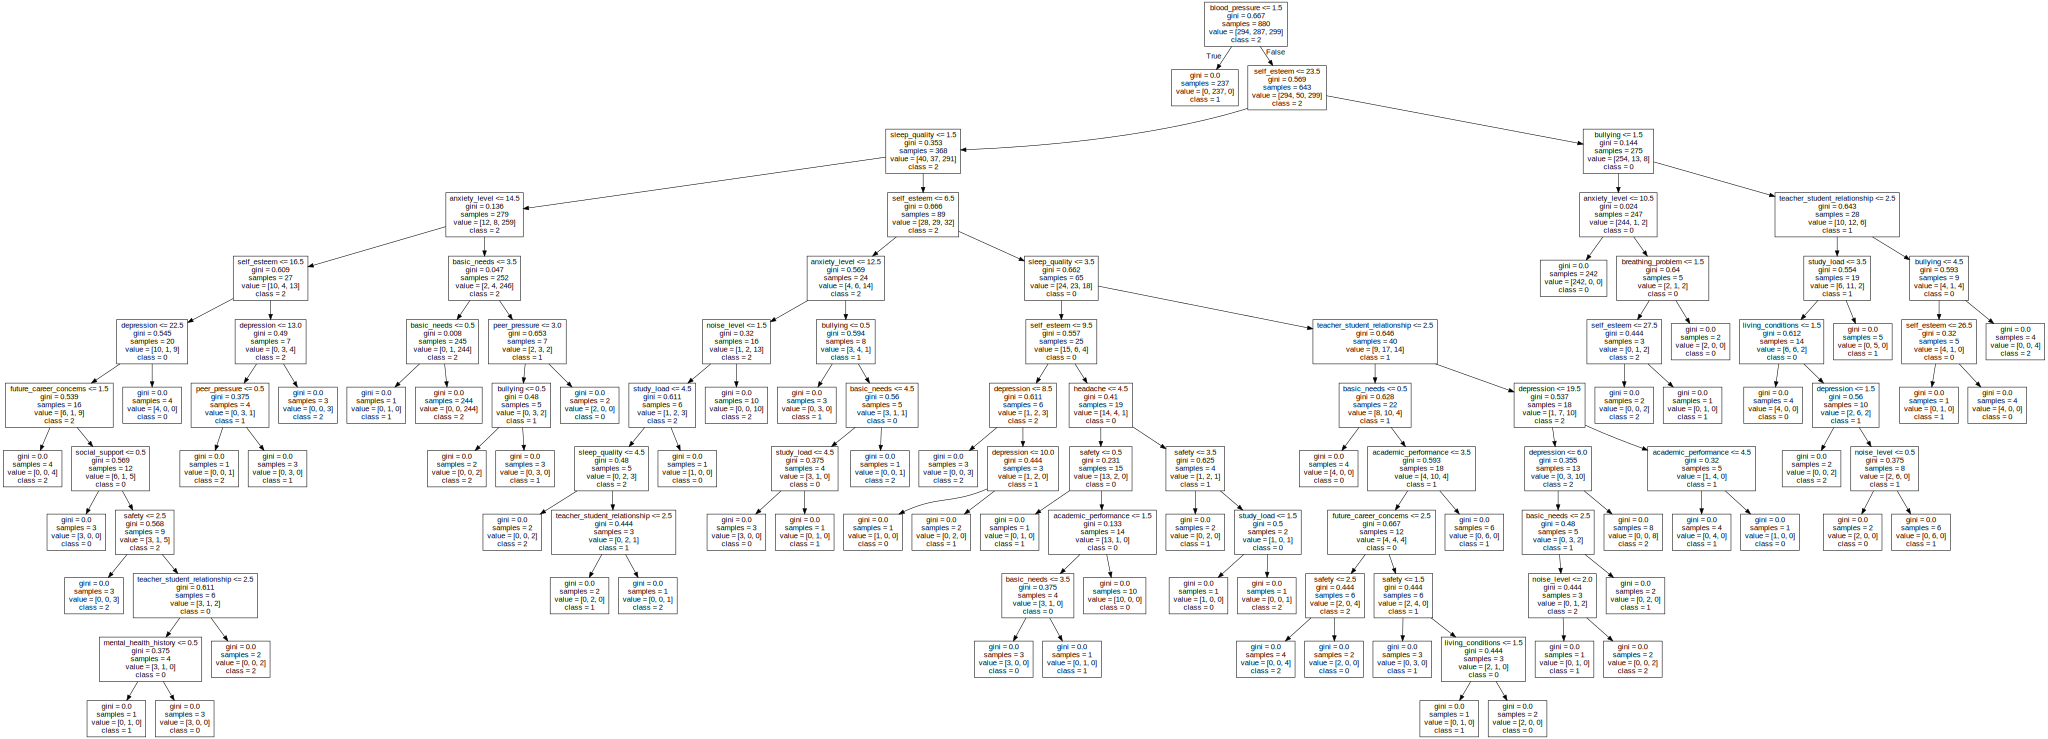

In [ ]:
graph